# **Task_01**

#**Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from themeasurements of the iris species and classify them.**



In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.**

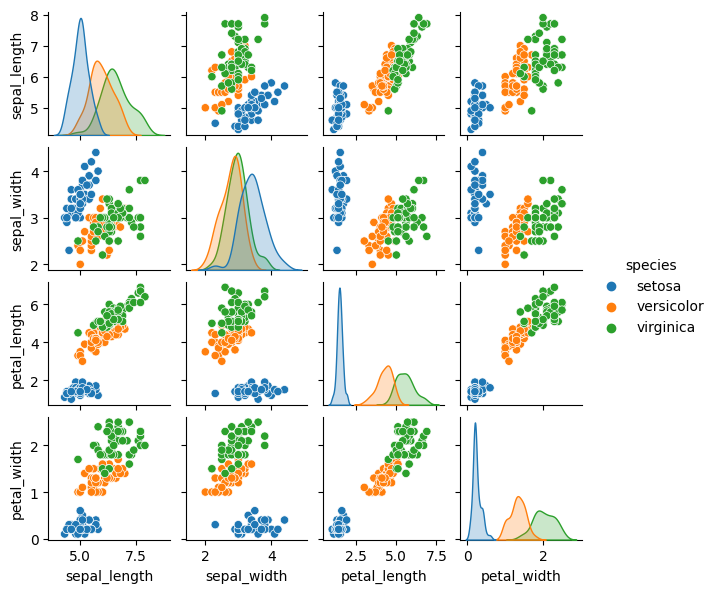

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

**For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb):**

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

**#### 4. Fit the model to the data**

**Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:**

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

**With the data arranged, we can follow our recipe to predict the labels:**

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

**Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true values:**

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

**With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!**

**### Unsupervised Learning Example: Iris Dimensionality**

**As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four-dimensional: there are four features recorded for each sample.
The task of dimensionality reduction centers around determining whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or more!
Here we will use *principal component analysis* (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.Following the sequence of steps outlined earlier, we have:**

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model
model.fit(X_iris)                      # 3. Fit to data
X_2D = model.transform(X_iris)         # 4. Transform the data

**Now let's plot the results. A quick way to do this is to insert the results into the original Iris `DataFrame`, and use Seaborn's `lmplot` to show the results (see the following figure):**

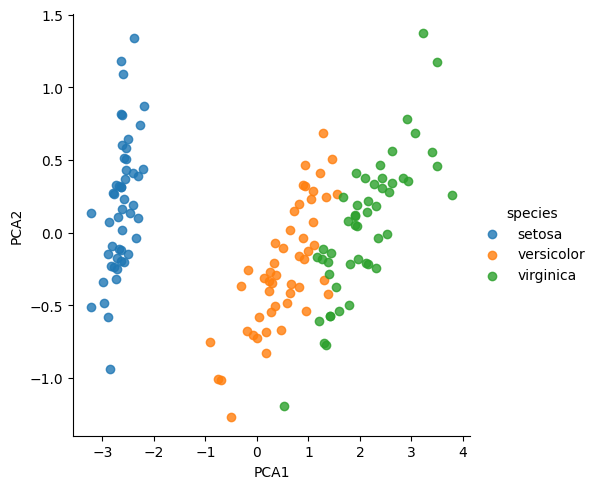

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

**We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This suggests to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.**

**### Unsupervised Learning Example: Iris Clustering**

**Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a *Gaussian mixture model* (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.**

**We can fit the Gaussian mixture model as follows:**

In [20]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instantiate the model
model.fit(X_iris)                                # 3. Fit to data
y_gmm = model.predict(X_iris)                    # 4. Determine labels

**As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results (see the following figure):**

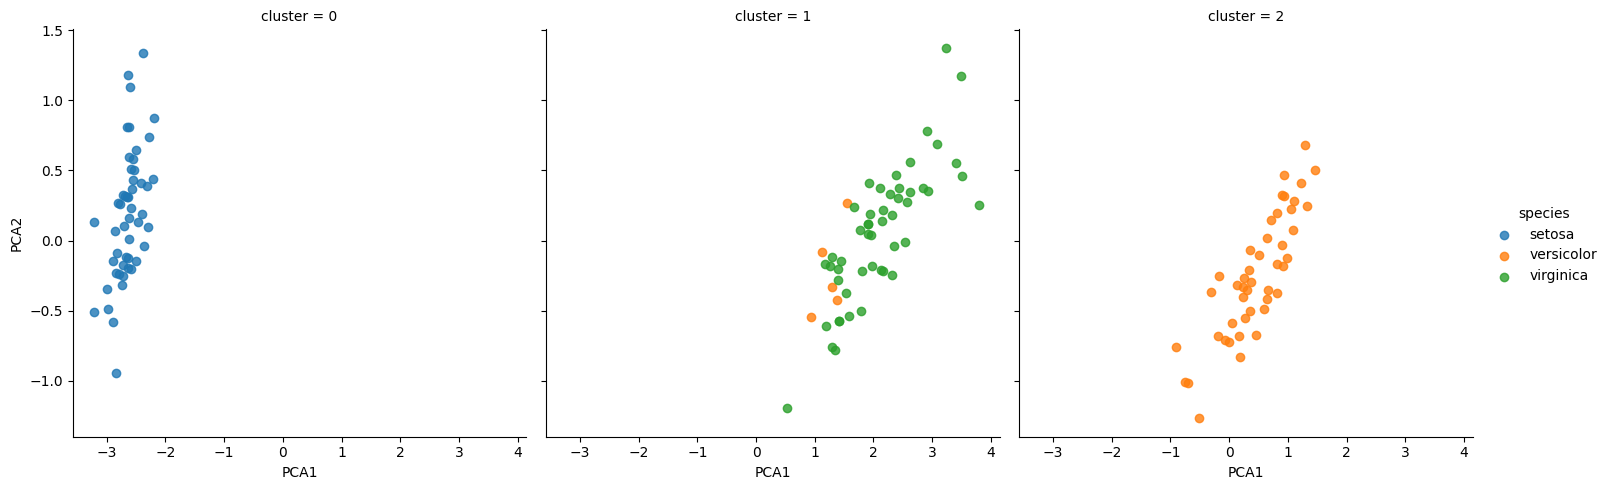

In [21]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

**By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying labels: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationships between the samples they are observing.**